In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report 

In [5]:
df = pd.read_csv("Titanic-Dataset.csv")

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [9]:
df["Sex"]=df["Sex"].map({"male":0,"female":1})

In [11]:
x=df[["Pclass","Fare","Sex","Age"]]
y=df["Survived"]

In [14]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2)

In [15]:
Model = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=42)

In [16]:
Model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [17]:
y_pred = Model.predict(x_test)

In [19]:
print(f"accuracy:{accuracy_score(y_test,y_pred)}")

accuracy:0.8379888268156425


In [21]:
print(confusion_matrix(y_test,y_pred))

[[107  12]
 [ 17  43]]


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       119
           1       0.78      0.72      0.75        60

    accuracy                           0.84       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.84      0.84      0.84       179



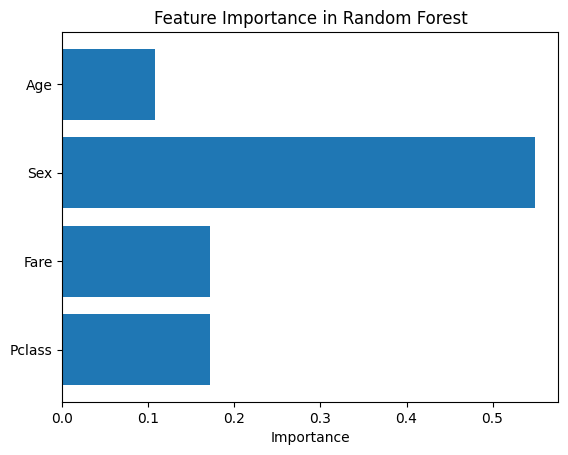

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

importances = Model.feature_importances_
features = x_train.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()
